In [1]:
# Thoomas Goldman 2023
# DOLPHINN
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from tudatpy.kernel import constants

#Get the absolute path of the current script
current_path = os.path.dirname(os.path.abspath('__file__'))
dolphinn_path = os.path.join(current_path, '..')
sys.path.append(dolphinn_path)

from DOLPHINN.pinn import DOLPHINN 
from DOLPHINN import plotting
from DOLPHINN import utils

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


### Load the DOLPHINNS as Solution instances in a list

In [2]:
cases = []

for i in range(10):
    case = DOLPHINN.from_solution(f"../Data/Optimisation/LVLH/mars_weights_grid_1_5_revolv/weight_{i}/", verbose = False)
    case.verify()
    cases.append(case) 

'compile' took 0.003580 s

'compile' took 0.001480 s

'compile' took 0.001605 s

'compile' took 0.001549 s

'compile' took 0.001425 s

'compile' took 0.001659 s

'compile' took 0.001439 s

'compile' took 0.001434 s

'compile' took 0.001393 s

'compile' took 0.001439 s



### Extract the relevant metrics (fuel and final position error)

In [3]:
weigths = np.zeros(len(cases))
fuel = np.zeros(len(cases))
final_dr = np.zeros(len(cases))
train_time = np.zeros(len(cases))

for i, case in enumerate(cases): 
    weigth = case.config['train_0']['loss_weigths'][-1]
    weigths[i] = weigth
    fuel[i] = case.loss_test[-1, -1]/weigth
    final_dr[i] = np.linalg.norm(case.states["NDcartesian"][-1,1:3] - case.bench.states["NDcartesian"][-1,1:3])
    train_time[i] = case.full_train_time              

### Make the weigth dependency plot 

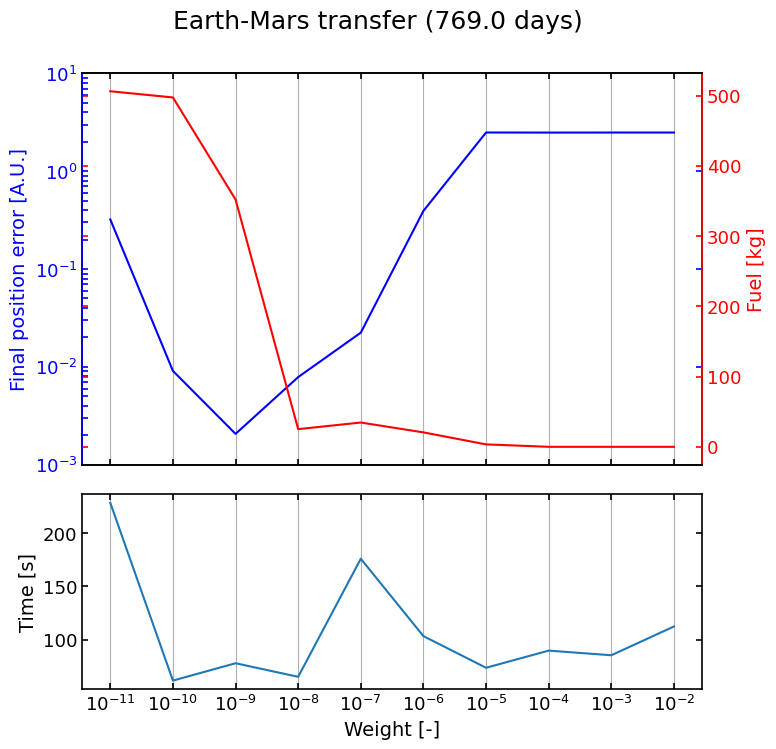

In [4]:
fig, (ax_finaldr, ax_time) = plt.subplots(2, 1, sharex = True, figsize = (8, 8), gridspec_kw={'height_ratios': [2, 1]})
fig.suptitle(f"Earth-Mars transfer ({np.round(cases[0].data['tfinal']*cases[0].data['time_scale']/(3600*24), 0)} days) ", 
            fontsize = 18, 
            y = 0.96)
fig.subplots_adjust(hspace=0.1)

ax_fuel = ax_finaldr.twinx()

ax_finaldr.plot(weigths, final_dr, color = 'b', label = "Dynamics") 
ax_fuel.plot(weigths, fuel, color = 'r', label = "Objective") 
ax_time.plot(weigths, train_time)

ax_finaldr.set_ylabel("Final position error [A.U.]", fontsize = 14)
ax_fuel.set_ylabel("Fuel [kg]", fontsize = 14)
ax_time.set_ylabel("Time [s]", fontsize = 14) 
ax_time.set_xlabel("Weight [-]", fontsize = 14) 

ax_finaldr.yaxis.label.set_color('b')
ax_finaldr.tick_params(axis='y', which = "both", colors='b')
ax_fuel.yaxis.label.set_color('r')
ax_fuel.tick_params(axis='y', colors='r')
ax_fuel.spines['left'].set_color('b')
ax_fuel.spines['right'].set_color('r')

ax_finaldr.set_yscale("log")
ax_finaldr.set_xscale("log")
ax_time.set_xscale("log")
ax_finaldr.set_ylim(1e-3, 10)
ax_finaldr.set_xticks(weigths)

ax_finaldr.xaxis.grid(True)
ax_time.xaxis.grid(True)


for ax in [ax_fuel, ax_finaldr, ax_time]: 
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(labelsize=13)
    ax.tick_params(axis="both",direction="in",which="both", length=4, width = 1.2)
    ax.tick_params(bottom=True, top=True, left=True, right=True)